In [230]:
# y -> outlet liquid temperature
# q(t) -> liquid flow rate
# Narx -> yhat(t+1|t) = f(y(t) ... y(t-3) u(t) ... u(t-9))

#read data
data = open('../exchanger/exchanger.dat')
lst = []
for line in data:
    lst += [line.split()]
time = [float(x[0]) for x in lst]
u = [float(x[1]) for x in lst]
y = [float(x[2]) for x in lst]

In [231]:
#divide identification set and validation set
ID_LENGHT = 3000
time_id = time[:ID_LENGHT]
u_id = u[:ID_LENGHT]
y_id = y[:ID_LENGHT]

time_val = time[ID_LENGHT:]
u_val = u[ID_LENGHT:]
y_val = y[ID_LENGHT:]

In [232]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

def polynomialExpansion(regressors, deg = 2):
    poly = PolynomialFeatures(deg)
    expansion = poly.fit_transform(regressors)
    return expansion

In [233]:
Y = np.array(y_id[10:len(y_id)])
PHI = []
for i in range(ID_LENGHT - 10):
    regressors = [u_id[i:i+10] + y_id[6+i:10+i]]
    PHI.append(polynomialExpansion(regressors,3)[0])
PHI = np.array(PHI)

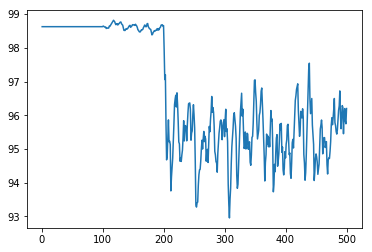

In [234]:
plt.plot(time_id[:500], y_id[:500])
plt.show()

In [235]:
A = np.zeros((PHI.shape[1],PHI.shape[1]))
W = np.zeros(PHI.shape)
g = np.array([])
np.fill_diagonal(A,1)
for k in range(PHI.shape[1]):
    if k == 0:
        W[:,0] = PHI[:,0]
        g = np.append(g, (np.dot(W[:,0],Y))/np.power(np.linalg.norm(W[:,0]),2))
    else:
        temp = np.zeros(PHI.shape[0])
        for i in range(k):
            A[i,k] = (np.dot(W[:,i],PHI[:,k]))/np.power(np.linalg.norm(W[:,i]),2)
            temp += A[i,k] * W[:,i]
        W[:,k] = PHI[:,k] - temp
        g = np.append(g, (np.dot(W[:,k],Y))/np.power(np.linalg.norm(W[:,k]),2))

theta = np.zeros(len(g))
for i in reversed(range(len(g))):
    if i == len(g):
        theta[i] = g[i]
    else:
        temp = 0
        for k in range(i+1, len(g)):
            temp += A[i,k] * theta[k]
        theta[i] = g[i] - temp

In [236]:
y_hat = np.dot(PHI, theta)

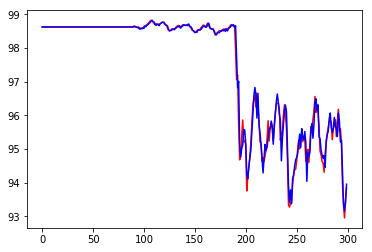

In [237]:
plt.plot(y_id[10:310], color='red')
plt.plot(y_hat[:300], color='blue')
plt.show()